In [111]:
# Install required packages
!pip install sastrawi google_play_scraper
!pip install transformers torch

# Initialization Phase

In [112]:
import os
from google.colab import drive

# Mounting to drive.
drive.mount("/content/drive")

# Define the file path in Google Drive.
basePath = "/content/drive/MyDrive/Berkas Sidang/Model"

# Define files path location
datasetWithLabel = os.path.join(basePath, "datasources/brimo_feature-label.csv")
datasetOriginal = os.path.join(basePath, "datasources/brimo(original).csv")
datasetResampled = os.path.join(basePath, "datasources/brimo_resampled(balance).csv")
datasetStemmed = os.path.join(basePath, "datasources/brimo_after_stemming.csv")
datasetProcessed = os.path.join(basePath, "datasources/brimo(processed).csv")
datasetResultPrediction = os.path.join(basePath, "datasources/brimo_result_prediction.csv")

# Define pickles, vizs and libs folders
libsPath = os.path.join(basePath, "libs")
vizPath = os.path.join(basePath, "visualizations")
picklesPath = os.path.join(basePath, "pickles")
maskPath = os.path.join(basePath, "assets/brimo-logo.png")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
from tqdm import tqdm
import nltk

# Initialize funcs and init required module addons package
tqdm.pandas()
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Using Knowledge Discovery Database Methodology

## Phase 1. Selection

In [114]:
import csv
from google_play_scraper import reviews, Sort
from datetime import datetime

app_id = 'id.co.bri.brimo'

# Set the date range from 1 August 2024 to 31 August 2024
start_date = datetime(2024, 8, 1)
end_date = datetime(2024, 8, 31, 23, 59, 59)  # Include the entire day of 31 August 2024
all_reviews = []
continuation_token = None

while True:
    result, continuation_token = reviews(
        app_id,
        lang='id',
        country='id',
        sort=Sort.NEWEST,
        count=100,
        continuation_token=continuation_token
    )

    for review in result:
        review_date = datetime.fromtimestamp(review['at'].timestamp())
        # Only append reviews that fall within the specified date range
        if start_date <= review_date <= end_date:
            all_reviews.append(review)
        # If the review date is before the start date, stop fetching more reviews
        elif review_date < start_date:
            continuation_token = None
            break

    # If there is no continuation token, break the loop
    if not continuation_token:
        break

# Write the reviews to a CSV file
with open(datasetOriginal, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=all_reviews[0].keys())  # Use keys from the first review
    writer.writeheader()
    writer.writerows(all_reviews)

print(f"Result saved in: '{datasetOriginal}' with length: '{len(all_reviews)}'.")

Result saved in: '/content/drive/MyDrive/Berkas Sidang/Model/datasources/brimo(original).csv' with length: '13422'.


In [115]:
import pandas as pd

# Load dataset (BRImo scrapping result(origin)).
df = pd.read_csv(datasetOriginal)

# Display 5 first data and 5 last data.
pd.concat([
    df.head(),
    df.tail()
])

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,782b1e99-7a55-4657-9966-9d0c07570a61,Ana Diana,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus,5,0,2.67.1,2024-08-31 23:59:49,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2024-09-01 08:02:57,2.67.1
1,2966eb1e-23dd-4508-83bf-cf590df5a304,Anisa Awalia,https://play-lh.googleusercontent.com/a/ACg8oc...,Mantulllll,5,0,2.67.1,2024-08-31 23:56:40,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2024-09-01 08:02:58,2.67.1
2,b8e8c4bc-966e-40cd-a5c7-8a117628b56f,Tanti Siahaya,https://play-lh.googleusercontent.com/a/ACg8oc...,"BRImo sangat memudahkan sya ber transaksi,tp k...",5,0,2.67.1,2024-08-31 23:55:49,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2024-09-01 14:47:17,2.67.1
3,7dbc2373-e2da-4881-975c-e230af013bea,Rahmat Ahmat,https://play-lh.googleusercontent.com/a-/ALV-U...,Baik sekali,5,0,2.66.0,2024-08-31 23:50:23,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2024-09-01 08:03:01,2.66.0
4,8335eabe-5b5f-4b29-be36-21fbdd03181c,angga risbiantoro,https://play-lh.googleusercontent.com/a-/ALV-U...,sangat memebantu,5,0,2.67.1,2024-08-31 23:48:59,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2024-09-01 08:03:02,2.67.1
13417,4d927c3c-d396-4504-b6f4-aac35e019c8f,HARIANTO 26,https://play-lh.googleusercontent.com/a/ACg8oc...,Mempermudah Transaksi,5,0,2.64.0,2024-08-01 00:07:22,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2024-08-01 12:52:17,2.64.0
13418,0bd9f1b9-5ac5-4498-a325-6888ad716382,Mba Wati,https://play-lh.googleusercontent.com/a/ACg8oc...,Sangat terbantu,5,0,2.63.0,2024-08-01 00:07:17,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2024-08-01 12:52:15,2.63.0
13419,5c1df784-69b0-448f-a947-7540a330c804,Ade Rohman,https://play-lh.googleusercontent.com/a-/ALV-U...,Semoga gak eror lagi ya (kalo mau ganti HP),5,0,NaN,2024-08-01 00:06:50,Terima kasih atas ulasannya. Semoga aplikasi B...,2024-08-11 02:32:13,NaN
13420,a346f397-ebd4-4672-8f0a-39c432a7944b,Al gihan (Alif),https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi bagus banget,5,0,2.62.0,2024-08-01 00:05:02,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2024-08-01 12:52:14,2.62.0
13421,3cc2adac-578a-4fb3-bfa0-15ac29e519a5,TU25 Lk5 0n0,https://play-lh.googleusercontent.com/a-/ALV-U...,"Setelah di update, aplikasi tidak bisa di Klik...",4,2,2.64.0,2024-08-01 00:01:07,"Hai, Sobat BRI. Mohon maaf atas kendala yang d...",2024-11-03 05:37:18,2.64.0


In [116]:
# Show origin dataset columns
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

In [117]:
# Word counts from original data before processed.
word_before_processed = pd.Series(" ".join(df["content"]).split())
len(word_before_processed)

89444

In [118]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def generate_wordcloud(title, data, filename):
    mask = np.array(Image.open(maskPath).convert("L"))

    wordcloud = WordCloud(
        background_color="white",
        mode="RGB",
        width=1600,
        height=800,
        colormap="gist_rainbow_r",
        collocations=False,
        mask=mask,
        min_font_size=8
    ).generate(data)

    plt.figure(figsize=(20, 10))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

    plt.savefig(os.path.join(vizPath, filename), format="png")

    plt.show()


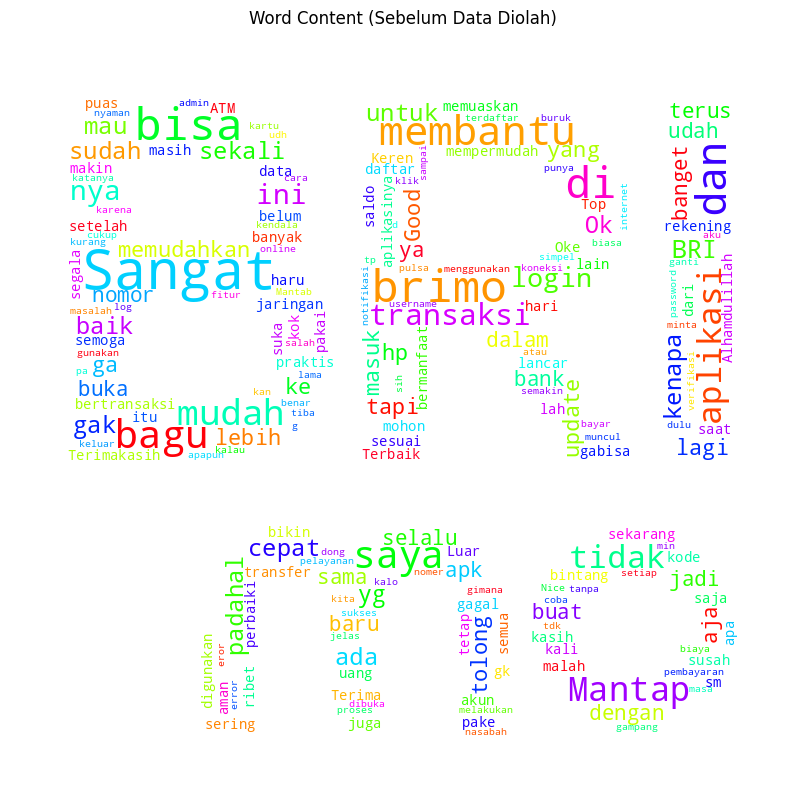

In [119]:
# Display. wordcloud content before processed.
data_before_preprocess = " ".join(word_before_processed)
generate_wordcloud("Word Content (Sebelum Data Diolah)", " ".join(word_before_processed), "data-origin-wordcoloud.png")

### 1. Text Cleaning

In [120]:
import re

# Text Cleaning
def text_cleaning(content):
    content = content.lower() # make it into lower case
    content = re.sub("[^a-z]", " ", content) # delete all chars except a-z
    content = re.sub("\t", " ", content) # change tab into space
    content = re.sub("\n", " ", content) # change new line unicode into space
    content = re.sub("\s+", " ", content) # change space which more than 1 into 1
    content = content.strip() # remove spaces at the beginning and end of words

    return content

df["cleaned_content"] = df["content"].progress_apply(text_cleaning)
df[["content", "cleaned_content"]].head(11)

100%|██████████| 13422/13422 [00:00<00:00, 93604.89it/s]


,content,cleaned_content
0,Bagus,bagus
1,Mantulllll,mantulllll
2,"BRImo sangat memudahkan sya ber transaksi,tp k...",brimo sangat memudahkan sya ber transaksi tp k...
3,Baik sekali,baik sekali
4,sangat memebantu,sangat memebantu
5,Sangat mudah Dan sangat membantu sekali,sangat mudah dan sangat membantu sekali
6,Mempermudah bertransaksi,mempermudah bertransaksi
7,Bagai mana cara daftar nya apa harus ke kantor...,bagai mana cara daftar nya apa harus ke kantor...
8,Good job,good job
9,Mantap,mantap


### 2. Stopword Removal

In [121]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords

# Get stopwords from Sastrawi and Nltk
factory = StopWordRemoverFactory()
stopword_sastrawi = factory.get_stop_words()
stopword_nltk = set(stopwords.words("indonesian"))

In [122]:
sastrawi_df = pd.DataFrame(stopword_nltk)
nltk_df = pd.DataFrame(stopword_sastrawi)

common = sastrawi_df.merge(nltk_df, on = [0], how = "left")
not_exist = nltk_df[(~nltk_df[0].isin(common[0]))] # ~ -> Negation (True to False)
not_exist

,0
69,dimana
70,kemana
77,kah
81,selagi
85,kecuali
89,seraya
95,dsb
96,dst
97,dll
99,dulunya


In [123]:
content_before_stopword = df.copy()
content_before_stopword.rename(columns={'cleaned_content': 'before_stopword'}, inplace=True)

In [124]:
# Stopword Removal
def stopword_removal(content):
    # Stopword Sastrawi
    content = content.split() # Split word by word
    content = [w for w in content if w not in stopword_sastrawi] # Remove stopword using sastrawi first
    content = " ".join(w for w in content) # join all word isn't stopword

    # NLTK Stopword
    content = content.split() # Split word by word
    content = [w for w in content if w not in stopword_nltk] # emove stopword using nltk too
    content = " ".join(w for w in content) # join all word isn't stopword

    return content

# Additional Stopwords
def apply_additional_stopwords(content):
    with open(os.path.join(libsPath, "addons_stopwords.txt"), "r") as f:
        additional_stopwords = f.read().splitlines()

    content = content.split() # split word by word
    content = [w for w in content if w not in additional_stopwords] # remove stopwords
    content = " ".join(w for w in content) # join all words isn't stopwords.

    return content

# Apply stopword removal function
df["cleaned_content"] = df["cleaned_content"].progress_apply(stopword_removal)
df["cleaned_content"] = df["cleaned_content"].progress_apply(apply_additional_stopwords)

100%|██████████| 13422/13422 [00:38<00:00, 353.15it/s]


In [125]:
before_after_stopword = pd.DataFrame({
    "Before Stopword": content_before_stopword["before_stopword"].head(20),
    "After Stopword": df["cleaned_content"].head(20)
})

before_after_stopword

,Before Stopword,After Stopword
0,bagus,bagus
1,mantulllll,mantulllll
2,brimo sangat memudahkan sya ber transaksi tp k...,memudahkan sya ber transaksi tp transaksi puls...
3,baik sekali,
4,sangat memebantu,memebantu
5,sangat mudah dan sangat membantu sekali,mudah membantu
6,mempermudah bertransaksi,mempermudah bertransaksi
7,bagai mana cara daftar nya apa harus ke kantor...,kantor terdekat karna online foto ktp masukan ...
8,good job,job
9,mantap,mantap


### 3. Correct the spelling

In [126]:
from datetime import datetime

def capture_time_execution(task_name, callback):
  print(f"\nRunning task: {task_name}\n")
  start_time = datetime.now()

  returned_state = callback()

  end_time = datetime.now()
  print("\nFinish with time: {:.2f} minutes".format((end_time - start_time).total_seconds() / 60))
  return returned_state

In [127]:
def correct_spelling(content):
    dictionaries = {}

    with open(os.path.join(libsPath, "addons_spelling.txt"), "r") as file:
        for x in file:
            f = x.split(":")
            if len(f) == 2:
                dictionaries[f[0].strip()] = f[1].strip()

    for start, replaced in dictionaries.items():
        new_content = re.sub(rf"\b{re.escape(start)}\b", replaced, content, flags=re.IGNORECASE)
        content = new_content

    return content

In [128]:
content_before_correct_spell = df.copy()
content_before_correct_spell.rename(columns={'cleaned_content': 'before_correct_spell'}, inplace=True)

In [129]:
# Capture the time required to apply `correct_spelling` function
df["cleaned_content"] = capture_time_execution("correct_spelling", lambda: df["cleaned_content"].progress_apply(correct_spelling))


Running task: correct_spelling



100%|██████████| 13422/13422 [07:02<00:00, 31.74it/s]


Finish with time: 7.05 minutes


In [130]:
before_after_correct_spell = pd.DataFrame({
    "Before Correction": content_before_correct_spell["before_correct_spell"].head(20),
    "After Correction": df["cleaned_content"].head(20)
})

before_after_correct_spell

,Before Correction,After Correction
0,bagus,bagus
1,mantulllll,mantap betul
2,memudahkan sya ber transaksi tp transaksi puls...,memudahkan sya ber transaksi tapi transaksi pu...
3,,
4,memebantu,membantu
5,mudah membantu,mudah membantu
6,mempermudah bertransaksi,mempermudah bertransaksi
7,kantor terdekat karna online foto ktp masukan ...,kantor terdekat karena online foto ktp masukan...
8,job,job
9,mantap,mantap


### 4. Stemming

In [131]:
content_before_stemming = df.copy()
content_before_stemming.rename(columns={'cleaned_content': 'before_stemming'}, inplace=True)

In [132]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer_factory = StemmerFactory()
stemmer_sastrawi = stemmer_factory.create_stemmer()

def stemm_content(content):
    return stemmer_sastrawi.stem(content)

# Save the stemmed contents into the brimo_cs DataFrame
df['cleaned_content'] = capture_time_execution("stemm_content", lambda: df['cleaned_content'].progress_apply(stemm_content))


Running task: stemm_content



100%|██████████| 13422/13422 [08:41<00:00, 25.75it/s]


Finish with time: 8.69 minutes


In [133]:
before_after_stemming = pd.DataFrame({
    "Before Stemming": content_before_stemming["before_stemming"].head(20),
    "After Stemming": df["cleaned_content"].head(20)
})

before_after_stemming

,Before Stemming,After Stemming
0,bagus,bagus
1,mantap betul,mantap betul
2,memudahkan sya ber transaksi tapi transaksi pu...,mudah sya ber transaksi tapi transaksi pulsa t...
3,,
4,membantu,bantu
5,mudah membantu,mudah bantu
6,mempermudah bertransaksi,mudah transaksi
7,kantor terdekat karena online foto ktp masukan...,kantor dekat karena online foto ktp masuk pas ...
8,job,job
9,mantap,mantap


In [134]:
# Save stemmed data.
df["cleaned_content"].to_csv(datasetStemmed, index = False)

In [135]:
# Load and show stemmed dataset from datasource.
brimo_stemmed = pd.read_csv(datasetStemmed)
brimo_stemmed

,cleaned_content
0,bagus
1,mantap betul
2,mudah sya ber transaksi tapi transaksi pulsa t...
3,NaN
4,bantu
...,...
13417,mudah transaksi
13418,bantu
13419,tidak salah kalau ganti
13420,bagus


### 5. Normalize data Remove "NaN" text

In [136]:
# Display rows data which have NaN value.
nan_content = brimo_stemmed[brimo_stemmed["cleaned_content"].isnull()]
nan_content.head(11)

,cleaned_content
3,NaN
20,NaN
31,NaN
53,NaN
56,NaN
57,NaN
69,NaN
78,NaN
85,NaN
91,NaN


In [137]:
print(f"Count of NaN content in dataset: {len(nan_content)}")

Count of NaN content in dataset: 1172


In [138]:
# Remove rows data which contain NaN
filled_content = brimo_stemmed[~brimo_stemmed["cleaned_content"].isnull()].copy()
filled_content.head(11)

,cleaned_content
0,bagus
1,mantap betul
2,mudah sya ber transaksi tapi transaksi pulsa t...
4,bantu
5,mudah bantu
6,mudah transaksi
7,kantor dekat karena online foto ktp masuk pas ...
8,job
9,mantap
10,mudah urus


### 6. Tokenization

In [139]:
from nltk.tokenize import word_tokenize

filled_content["tokens"] = filled_content["cleaned_content"].progress_apply(word_tokenize)
filled_content[["cleaned_content", "tokens"]].head(5)

100%|██████████| 12250/12250 [00:00<00:00, 15591.93it/s]


,cleaned_content,tokens
0,bagus,[bagus]
1,mantap betul,"[mantap, betul]"
2,mudah sya ber transaksi tapi transaksi pulsa t...,"[mudah, sya, ber, transaksi, tapi, transaksi, ..."
4,bantu,[bantu]
5,mudah bantu,"[mudah, bantu]"


### 7. Labeling

In [140]:
from transformers import pipeline

label_pipe = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")
def get_label(text):
    result = label_pipe(text)
    return {'label': result[0]['label'], 'score': result[0]['score']}

def labeling(text):
    result = get_label(text)
    if result['label'] == 'positive' and result['score'] >= 0.85:
        return "Positive"
    elif result['label'] == 'negative' and result['score'] >= 0.85:
        return "Negative"
    else:
        return "Neutral"

# Applying `labeling` function to DataFrame.
filled_content["label"] = filled_content["cleaned_content"].progress_apply(labeling)
filled_content.head()

Device set to use cpu
100%|██████████| 12250/12250 [17:11<00:00, 11.88it/s]


,cleaned_content,tokens,label
0,bagus,[bagus],Positive
1,mantap betul,"[mantap, betul]",Positive
2,mudah sya ber transaksi tapi transaksi pulsa t...,"[mudah, sya, ber, transaksi, tapi, transaksi, ...",Negative
4,bantu,[bantu],Neutral
5,mudah bantu,"[mudah, bantu]",Positive


In [141]:
# Save dataset feature and label
filled_content[["cleaned_content", "label", "tokens"]].to_csv(datasetWithLabel, index = False)

## 3. Transformation

In [142]:
# Load dataset which contain label, cleaned_content and tokens.
import pandas as pd
df_feature_label = pd.read_csv(datasetWithLabel)

# Replace the label with numeric representation.
df_feature_label["label"] = df_feature_label["label"].replace({
    "Positive": 1,
    "Negative": 0,
    "Neutral": 2
})

# # Defining label and feature
X = df_feature_label["cleaned_content"]
y = df_feature_label["label"]

<ipython-input-142-718d877865b5>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_feature_label["label"] = df_feature_label["label"].replace({


In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

len(X_test)

4900

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize phase.
vectorizer = TfidfVectorizer(ngram_range=(1, 2),sublinear_tf=True , min_df=1)
X_tfidf_train = vectorizer.fit_transform(X_train)
X_tfidf_test = vectorizer.transform(X_test)

print("X Train shape: ")
print(X_tfidf_train.shape)
print("\n")
print("X Test shape: ")
print(X_tfidf_test.shape)

X Train shape: 
(7350, 16175)


X Test shape: 
(4900, 16175)


In [145]:
df_tfidf_train = pd.DataFrame(X_tfidf_train.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf_test = pd.DataFrame(X_tfidf_test.toarray(), columns=vectorizer.get_feature_names_out())


print("\nTF-IDF DataFrame (Training & Test):")
pd.concat([
    df_tfidf_train,
    df_tfidf_test
])


TF-IDF DataFrame (Training & Test):


,aa,aa zx,aamiin,aamiin istajib,aamiin terima,aamiin yra,aamin,aamin aamin,abdi,abdi mantan,...,yusername,yusername salah,za,zangat,zangat bantu,zte,zte blade,zx,zx de,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
y_train.value_counts()

,count
label,
1,4422
2,1852
0,1076


In [147]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf_train, y_train)

y_resampled.value_counts()

,count
label,
1,4422
2,4422
0,4422


In [148]:
# Save vectorizer in pickle format.
import pickle

with open(os.path.join(picklesPath, "vectorizer_tfidf.pkl"), "wb") as f:
    pickle.dump(vectorizer, f)

## Evaluation & Modeling

#### Support Vector Machine (SVM) - Data Mining

In [149]:
# Check the X_train and y_train dimension is balance or no.
print("Result of X and y dimension:\n")
print(X_resampled.shape)
print(y_resampled.shape)

Result of X and y dimension:

(13266, 16175)
(13266,)


In [150]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

svm = SVC(cache_size=500)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}

svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=10, scoring='accuracy', verbose=0, n_jobs=-1)
svm_grid_search.fit(X_resampled, y_resampled)

# Show the best result from search process.
print("Best parameters found: ", svm_grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(svm_grid_search.best_score_ * 100))

Best parameters found:  {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 95.61%


In [151]:
best_svc = svm_grid_search.best_estimator_
accuracies_svc = cross_val_score(estimator=best_svc, X=X_resampled, y=y_resampled, cv=10, n_jobs=-1)

# Capture cross-validation records.
cross_val_results = []
for i in list(accuracies_svc * 100):
    cross_val_results.append(round(i, 2))

cross_val_results

[92.54, 93.22, 94.88, 95.7, 96.83, 96.38, 96.0, 96.68, 97.13, 96.76]

#### Evaluation

In [ ]:
# Check whether the resulting average accuracy is the same
print(f"AVG from cross_val_results SVM: {np.array(cross_val_results).mean()}%")

In [153]:
# Defining function for visualize confusion matrix
def visualize_confusion_matrix(conf_mat, title, filename):
   plt.figure(figsize=(8, 6))
   sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1', '2'],
            yticklabels=['0', '1', '2'])
   plt.title(title, pad=20)
   plt.xlabel('Predicted Label')
   plt.ylabel('True Label')
   plt.savefig(os.path.join(vizPath, filename))
   plt.show()

In [154]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Confusion Matrix
y_pred_svc = cross_val_predict(best_svc, X_tfidf_test, y_test, cv = 10, n_jobs=-1)

# Classification Report
print("================ Classification Report SVM ===========\n")
print(classification_report(y_test, y_pred_svc, digits=5))
print("================ ===================== ===============\n")

================ Classification Report SVM ===========

              precision    recall  f1-score   support

           0    0.61753   0.64854   0.63265       717
           1    0.92874   0.92843   0.92858      2948
           2    0.75083   0.72955   0.74004      1235

    accuracy                        0.83735      4900
   macro avg    0.76570   0.76884   0.76709      4900
weighted avg    0.83836   0.83735   0.83776      4900

================ ===================== ===============



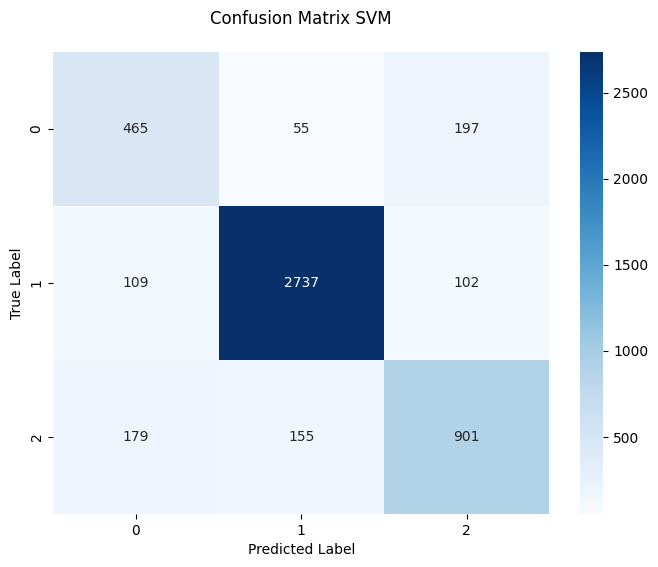

In [155]:
conf_mat_svc = confusion_matrix(y_test, y_pred_svc)
visualize_confusion_matrix(conf_mat_svc, "Confusion Matrix SVM", "confusion-matrix-svm.png")

In [156]:
def get_metrics(conf_mat):
    precision = np.diag(conf_mat) / np.sum(conf_mat, axis=0)
    recall = np.diag(conf_mat) / np.sum(conf_mat, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(conf_mat)) / np.sum(conf_mat)
    return precision, recall, f1_score, accuracy

In [157]:
precision_svc, recall_svc, f1_score_svc, accuracy_svc = calculate_metrics(conf_mat_svc)

print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1-Score: {f1_score_svc}")
print(f"Accuracy: {accuracy_svc:.4f}")

Precision: [0.61752988 0.92874109 0.75083333]
Recall: [0.64853556 0.92842605 0.72955466]
F1-Score: [0.63265306 0.92858355 0.74004107]
Accuracy: 0.8373


In [158]:
# Save model in pickle format
with open(os.path.join(picklesPath, "model_svc.pkl"), "wb") as f:
    pickle.dump(best_svc, f)

#### Naive Bayes Modeling - Data Mining

In [159]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb_param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'fit_prior': [True, False],
}

# GridSearchCV
nb_grid_search = GridSearchCV(nb, nb_param_grid, cv=10, scoring='accuracy', verbose=0, error_score='raise', n_jobs=-1)
nb_grid_search.fit(X_resampled, y_resampled)

# Tampilkan hasil terbaik
print("Best parameters found: ", nb_grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(nb_grid_search.best_score_ * 100))

Best parameters found:  {'alpha': 0.01, 'fit_prior': True}
Best cross-validation accuracy: 95.22%


#### 5. Evaluation

In [160]:
best_nb = nb_grid_search.best_estimator_
accuracies_nb = cross_val_score(estimator=best_nb, X=X_resampled, y=y_resampled, cv=10, n_jobs=-1)

# Capture Naive Bayes cross-validation records.
nb_cross_val_results = []
for i in list(accuracies_nb * 100):
    nb_cross_val_results.append(round(i, 2))

nb_cross_val_results

[94.05, 92.39, 93.75, 94.27, 96.31, 96.38, 96.61, 95.93, 96.3, 96.23]

In [161]:
# Check whether the resulting average accuracy is the same
print(f"AVG from cross_val_results NB: {np.array(nb_cross_val_results).mean()}%")

AVG from cross_val_results NB: 95.22200000000001%


In [162]:
y_pred_nb = cross_val_predict(best_nb, X_tfidf_test, y_test, cv = 10)

print("========== Classification Report Naive Bayes ========\n")
print(classification_report(y_test, y_pred_nb, digits=4))
print("=============== ===================== ===============\n")

========== Classification Report Naive Bayes ========

              precision    recall  f1-score   support

           0     0.6174    0.6234    0.6204       717
           1     0.9076    0.9332    0.9202      2948
           2     0.7371    0.6834    0.7092      1235

    accuracy                         0.8249      4900
   macro avg     0.7540    0.7467    0.7500      4900
weighted avg     0.8222    0.8249    0.8232      4900

=============== ===================== ===============



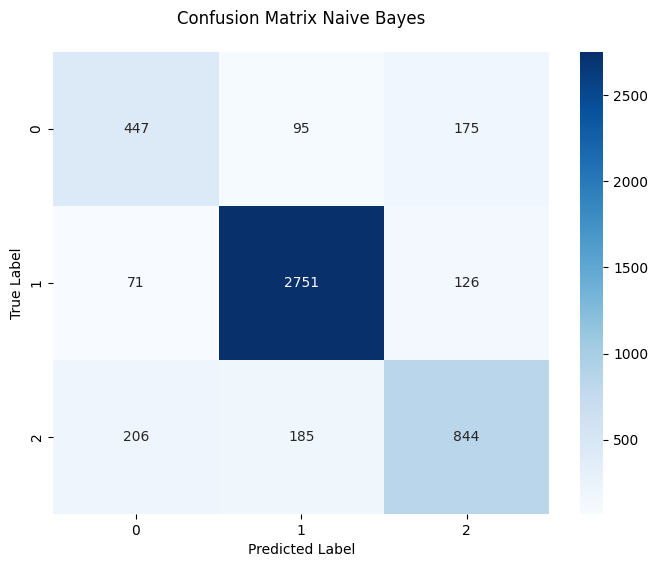

In [163]:
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
visualize_confusion_matrix(conf_mat_nb, "Confusion Matrix Naive Bayes", "confusion-matrix-nb.png")

In [164]:
precision_nb, recall_nb, f1_score_nb, accuracy_nb = get_metrics(conf_mat_nb)

print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1-Score: {f1_score_nb}")
print(f"Accuracy: {accuracy_nb:.4f}")

Precision: [0.61740331 0.90762125 0.7371179 ]
Recall: [0.62343096 0.93317503 0.68340081]
F1-Score: [0.6204025  0.92022077 0.7092437 ]
Accuracy: 0.8249


In [165]:
# Save model in pickle format
with open(os.path.join(picklesPath, "model_nb.pkl"), "wb") as f:
    pickle.dump(best_nb, f)

## A function for predict sentiment.

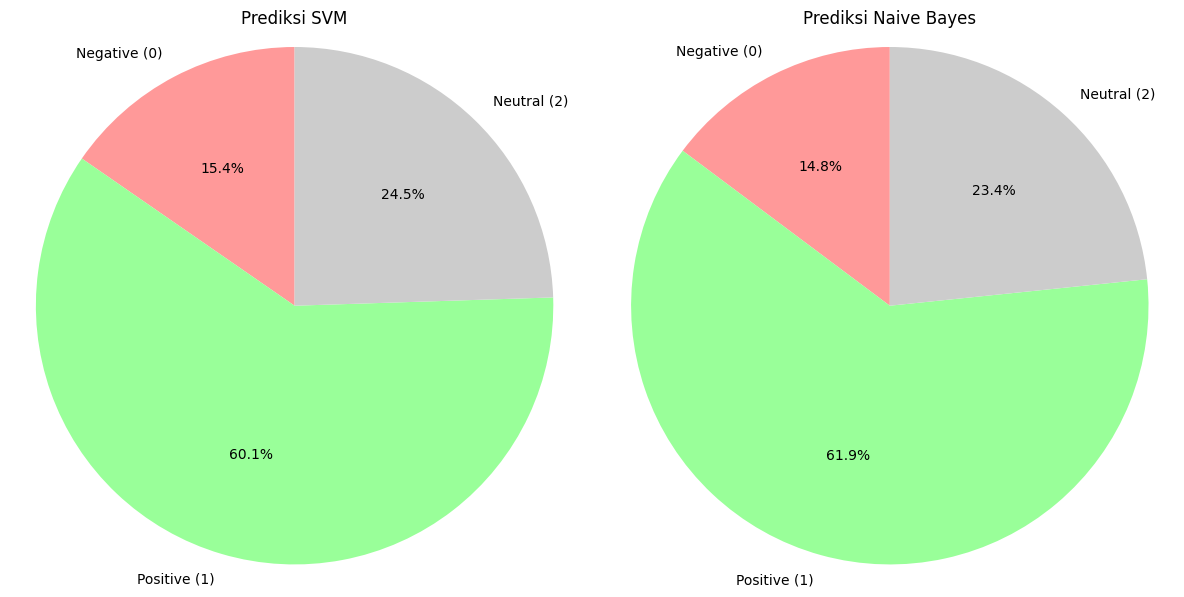

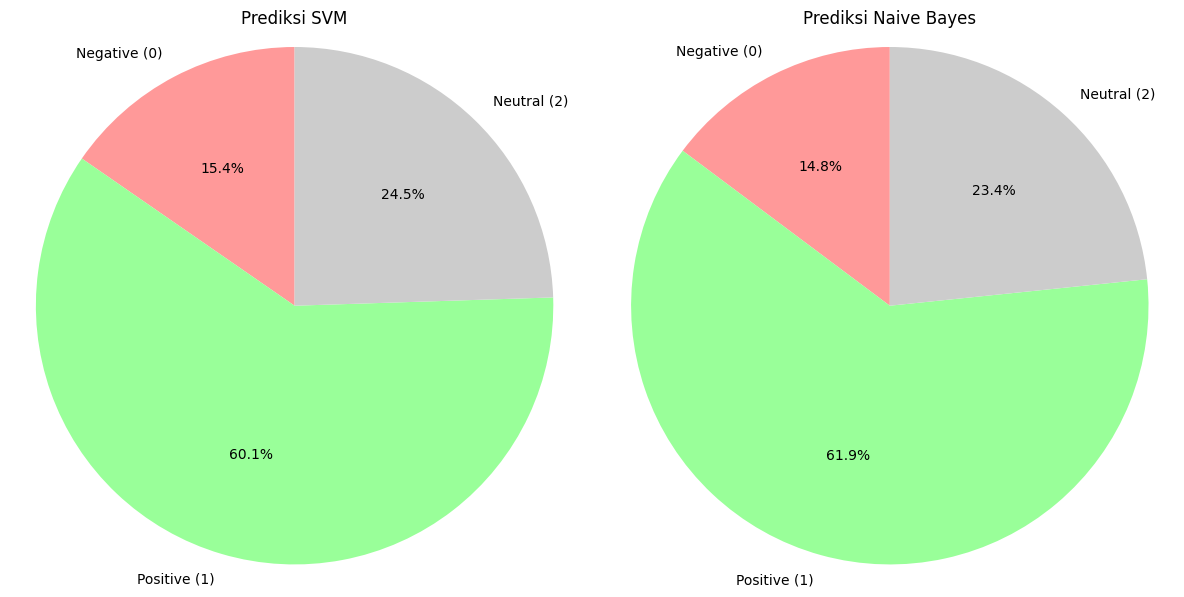

In [166]:
# Menghitung jumlah prediksi untuk SVM (0: Negative, 1: Positive, 2: Neutral)
svm_counts = pd.Series(y_pred_svc).value_counts().sort_index()
svm_labels = ['Negative (0)', 'Positive (1)', 'Neutral (2)']
svm_colors = ['#ff9999', '#99ff99', '#cccccc']

# Menghitung jumlah prediksi untuk Naive Bayes (0: Negative, 1: Positive, 2: Neutral)
nb_counts = pd.Series(y_pred_nb).value_counts().sort_index()
nb_labels = ['Negative (0)', 'Positive (1)', 'Neutral (2)']
nb_colors = ['#ff9999', '#99ff99', '#cccccc']

# Membuat figure dan axes untuk pie chart
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart untuk SVM
axs[0].pie(svm_counts, labels=svm_labels, colors=svm_colors, autopct='%1.1f%%', startangle=90)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
axs[0].set_title('Prediksi SVM')

# Pie chart untuk Naive Bayes
axs[1].pie(nb_counts, labels=nb_labels, colors=nb_colors, autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
axs[1].set_title('Prediksi Naive Bayes')

# Tampilkan chart
plt.tight_layout()
plt.show()